In [1]:
import re

from IPython.core.display import display, HTML

import pickle
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
with open('../../data/clean/misconduct_indicators_train.pkl', 'rb') as train_file:
    misconduct = pickle.load(train_file)

In [3]:
indicated_cols = [
    'misconduct_type',
    'court_type',
    'enforcement_agency',
    'contracting_party'
]

indicator_features = [
    col for col in misconduct.columns
    if re.search(f'^({"|".join(indicated_cols)})_', col)
]

design_matrix = misconduct[[*indicator_features]]
design_matrix = pd.concat(
    [
        design_matrix,
        pd.get_dummies(
            misconduct['disposition_type'],
            prefix='disposition_type'
        )
    ],
    axis=1
)

In [4]:
reduced = TSNE(n_components=2).fit_transform(design_matrix)

In [5]:
klass_to_color= {
    'Judgment Against Defendant': '#404040',
    'Settlement': '#804000',
    'Fine': '#008040',
    'Pending': '#400080',
    'Investigative Finding': '#408000',
    'Suspend/Debar - Employee': '#004080',
    'Pleaded Guilty': '#800040',
    'Administrative Agreement': '#606000',
    'Non-Prosecution Agreement': '#006060',
    'Restitution': '#600060',
    'Suspend/Debar - Company': '#c00000',
    'Found Guilty': '#00c000',
    'Deferred Prosecution Agreement': '#0000c0'
}

In [6]:
# (trouble with plot labels, so...)

display(HTML(
    ''.join([
        f'<div style="font-size: 10px; color: #ffffff; height: 16px; width: 200px; background-color: {klass_to_color[klass]}; position: inline">{klass}</div>'
        for klass
        in list(klass_to_color.keys())
    ])
))

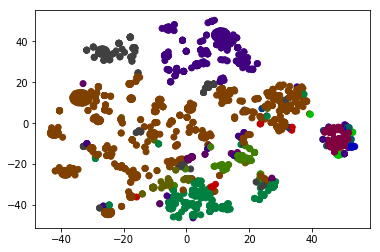

In [7]:
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=[
        klass_to_color[klass]
        for klass
        in misconduct['disposition_type']
    ]
)